### Import Libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

### Loading Data Set

In [18]:
df=pd.read_csv("Advertising_2023.csv")
df.sample(10)

,Unnamed: 0,digital,TV,radio,newspaper,sales
1194,1195,13.80,149.7,35.6,6.0,17.3
956,957,24.30,93.9,43.5,50.5,15.3
414,415,306.15,204.1,32.9,46.0,19.0
785,786,26.60,205.0,45.1,19.6,22.6
736,737,358.95,25.6,39.0,9.3,9.5
624,625,19.50,62.3,12.6,18.3,9.7
188,189,429.00,286.0,13.9,3.7,15.9
457,458,204.30,136.2,19.2,16.6,13.2
721,722,359.85,18.8,21.7,50.4,7.0
483,484,102.60,68.4,44.5,35.6,13.6


In [19]:
df=df.drop(["Unnamed: 0"],axis=1)
df.head()

,digital,TV,radio,newspaper,sales
0,345.15,156.0,37.8,69.2,22.1
1,66.75,46.0,39.3,45.1,10.4
2,25.80,18.3,45.9,69.3,9.3
3,227.25,145.1,41.3,58.5,18.5
4,271.20,165.2,10.8,58.4,12.9


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   digital    1199 non-null   float64
 1   TV         1199 non-null   float64
 2   radio      1199 non-null   float64
 3   newspaper  1199 non-null   float64
 4   sales      1199 non-null   float64
dtypes: float64(5)
memory usage: 47.0 KB


In [21]:
df.describe()

,digital,TV,radio,newspaper,sales
count,1199.000000,1199.00000,1199.000000,1199.000000,1199.000000
mean,135.472394,146.61985,23.240617,30.529942,14.005505
std,135.730821,85.61047,14.820827,21.712507,5.202804
min,0.300000,0.70000,0.000000,0.300000,1.600000
25%,24.250000,73.40000,9.950000,12.800000,10.300000
50%,64.650000,149.70000,22.500000,25.600000,12.900000
75%,256.950000,218.50000,36.500000,45.100000,17.400000
max,444.600000,296.40000,49.600000,114.000000,27.000000


In [22]:
df.shape

(1199, 5)

In [23]:
df.isna().sum()

digital      0
TV           0
radio        0
newspaper    0
sales        0
dtype: int64

# Exploratory Data Analysis
### Let's create some simple plots to check out the data !

<Axes: >

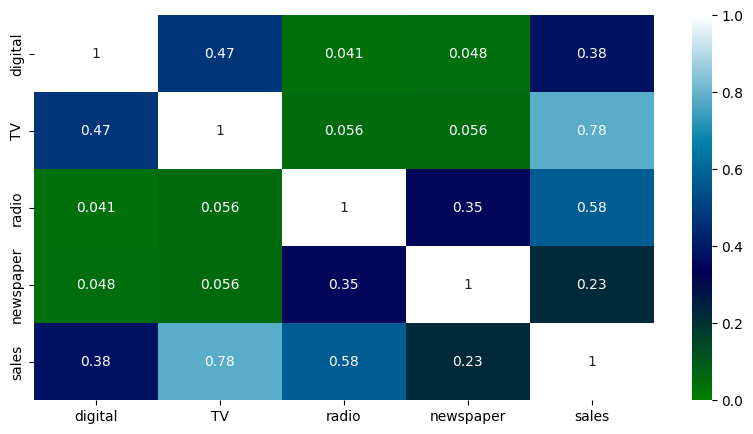

In [24]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,vmin=0,vmax=1,cmap='ocean')

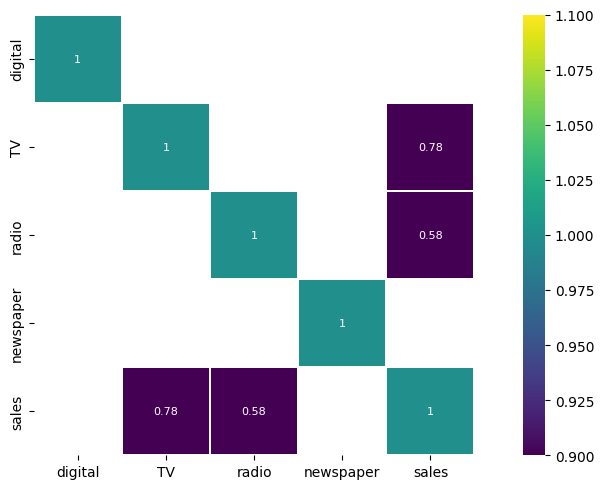

None

In [30]:
corr=df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr[(corr>=0.5)| (corr<=-0.7)],
            cmap='viridis',vmax=1.0,vmin=1.0,linewidths=0.1,
            annot=True,annot_kws={"size":8},square=True)
plt.tight_layout()
display(plt.show())

In [31]:
df.corr()

,digital,TV,radio,newspaper,sales
digital,1.000000,0.474256,0.041316,0.048023,0.380101
TV,0.474256,1.000000,0.055697,0.055579,0.781824
radio,0.041316,0.055697,1.000000,0.353096,0.576528
newspaper,0.048023,0.055579,0.353096,1.000000,0.227039
sales,0.380101,0.781824,0.576528,0.227039,1.000000


Plot all the columns separately, an efficient way to view the linear relations between variables is to use a "for loop" that plots all of the features at once
It seems thers's no clear linear relationships between the predictors.
At this point, we know that the variable TV will more likely give better prediction of Sales because of the high correlation and linearity of the two.

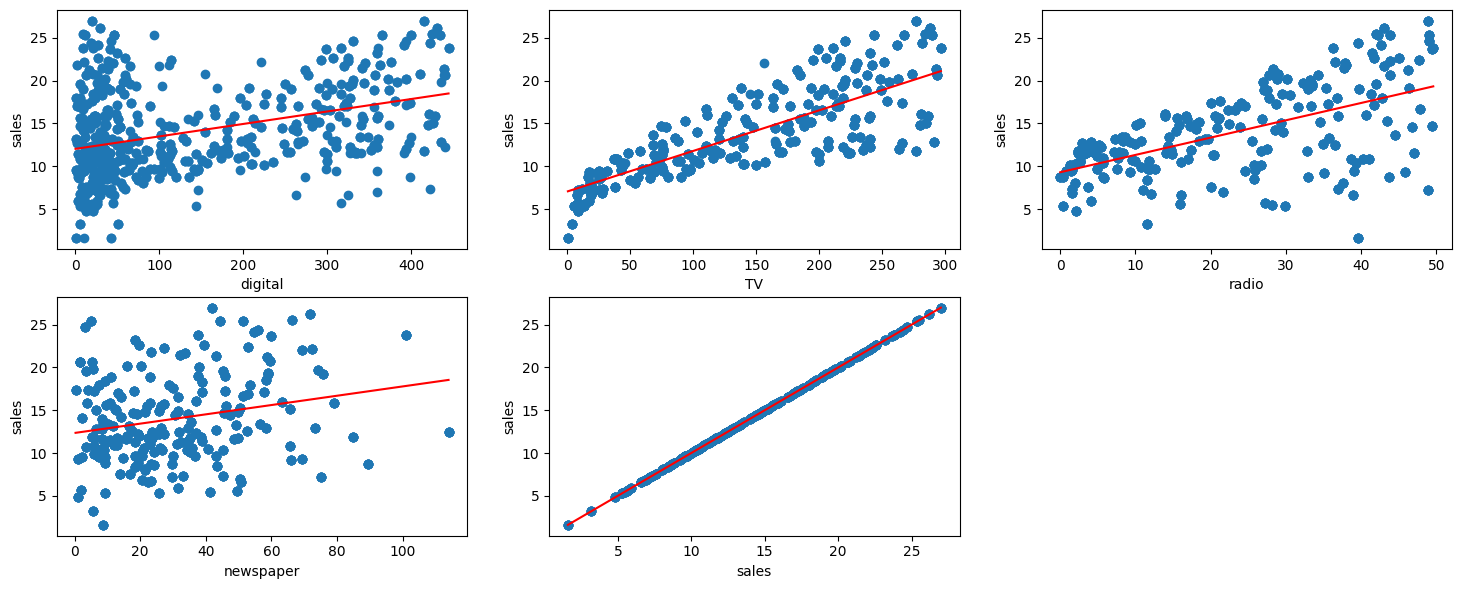

In [33]:
from scipy import stats
plt.figure(figsize=(18,18))
for i,col in enumerate(df.columns[0:13]):
    plt.subplot(5,3,i+1)
    x=df[col]
    y=df['sales']
    plt.plot(x,y,'o')
    plt.plot(np.unique(x),np.poly1d(np.polyfit(x,y,1))(np.unique(x)),color='red')
    plt.xlabel(col)
    plt.ylabel('sales')

## Data Preprocessing

In [35]:
x=df.iloc[:,:-1].values
x

array([[345.15, 156.  ,  37.8 ,  69.2 ],
       [ 66.75,  46.  ,  39.3 ,  45.1 ],
       [ 25.8 ,  18.3 ,  45.9 ,  69.3 ],
       ...,
       [  6.4 ,  94.2 ,   4.9 ,   8.1 ],
       [  8.1 ,  38.2 ,   3.7 ,  13.8 ],
       [  6.4 ,  94.2 ,   4.9 ,   8.1 ]])

In [37]:
y=df.iloc[:,-1].values
y

array([22.1, 10.4,  9.3, ...,  9.7,  7.6,  9.7])

In [40]:
normalize_features=keras.utils.normalize(x)
normalize_features

array([[0.89211961, 0.4032179 , 0.0977028 , 0.17886333],
       [0.66254734, 0.45658693, 0.39008405, 0.44765371],
       [0.29009225, 0.20576311, 0.51609436, 0.77920128],
       ...,
       [0.06744611, 0.99272247, 0.05163843, 0.08536149],
       [0.19480049, 0.91868871, 0.08898294, 0.33188231],
       [0.06744611, 0.99272247, 0.05163843, 0.08536149]])

## Train-Test-Split

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [42]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(839, 4) (360, 4) (839,) (360,)


# Build Network

In [44]:
model=Sequential()
model.add(Dense(4,input_dim=4,activation='relu'))
model.add(Dense(3,activation='relu'))
model.add(Dense(1))
model

<Sequential name=sequential_1, built=True>

In [45]:
model.compile(optimizer='adam',loss='mse',metrics=['mse'])
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=32)

Epoch 1/32
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 4331.8418 - mse: 4331.8418 - val_loss: 2727.8135 - val_mse: 2727.8135
Epoch 2/32
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2327.4436 - mse: 2327.4436 - val_loss: 1434.1801 - val_mse: 1434.1801
Epoch 3/32
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1215.4913 - mse: 1215.4913 - val_loss: 734.4456 - val_mse: 734.4456
Epoch 4/32
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 630.9095 - mse: 630.9095 - val_loss: 396.2391 - val_mse: 396.2391
Epoch 5/32
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 357.3096 - mse: 357.3096 - val_loss: 250.3904 - val_mse: 250.3904
Epoch 6/32
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 239.5577 - mse: 239.5577 - val_loss: 199.5024 - val_mse: 199.5024
Epoch 7/32
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 197.2955 - mse: 197.2955 - val_loss: 178.3638 - val_mse: 178.3638
Epoch 8/32
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 181.7271 - mse: 181.7271 - val_loss: 165.3069 - val_mse: 165.30

#### Visualization

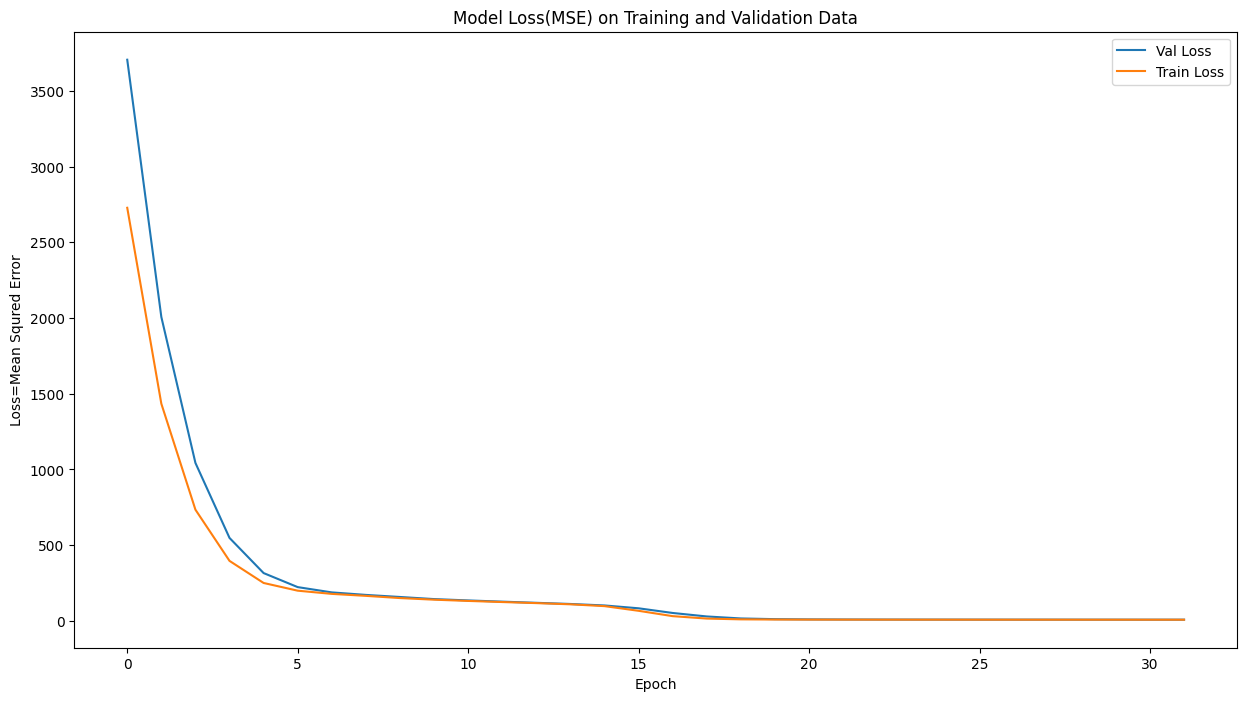

In [49]:
plt.figure(figsize=(15,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss(MSE) on Training and Validation Data')
plt.ylabel('Loss=Mean Squred Error')
plt.xlabel('Epoch')
plt.legend(['Val Loss','Train Loss'],loc='upper right')
plt.show()